Imports

In [2]:
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import tensorflow as tf

import utils

np.set_printoptions(precision=2)


tf.get_logger().setLevel('ERROR')
tf.autograph.set_verbosity(0)

Regression

In [3]:
# load the dataset form the text file
data = np.loadtxt('./data/data_w3_ex1.csv', delimiter=',')

# split the inputs and outputs into seperate arrays
X=data[: ,0]
y=data[: , 1]

# convert 1-D arrays into 2-D because the commands later will reqiute it
x=np.expand_dims(X , axis=1)
y=np.expand_dims(y , axis=1)

print(f"the shape of the inputs x is: {x.shape}")
print(f"the shape of the targets y is: {y.shape}")

the shape of the inputs x is: (50, 1)
the shape of the targets y is: (50, 1)


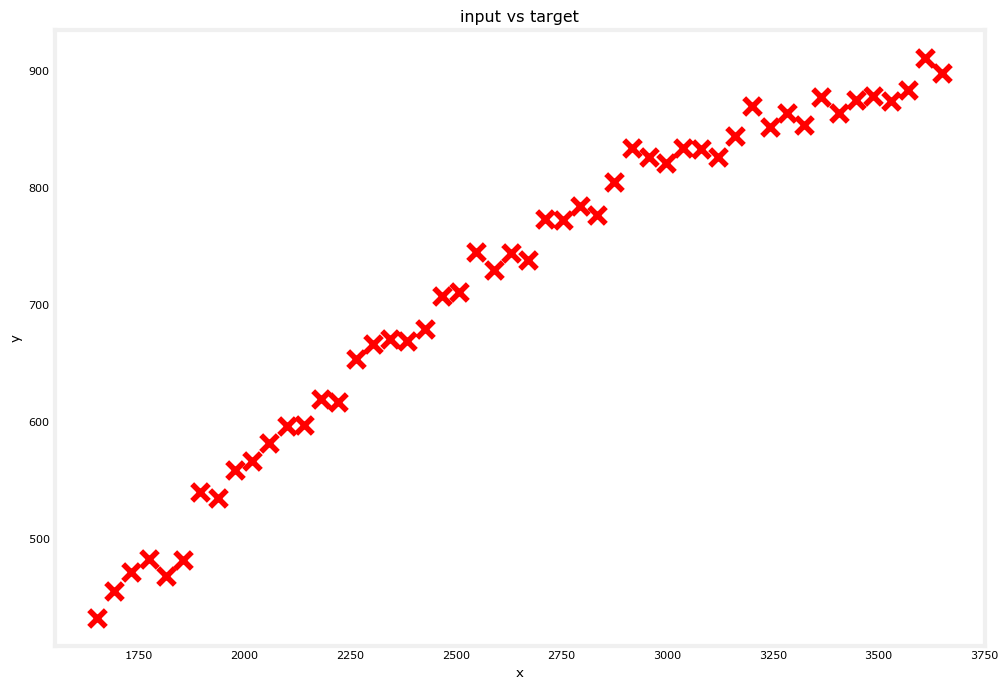

In [4]:
# plot the entire dataset
utils.plot_dataset(x=x , y=y , title="input vs target")

In [5]:
x_train , x_ , y_train , y_= train_test_split(x , y , test_size=0.40 , random_state=1)

x_cv , x_test , y_cv , y_test = train_test_split( x_ , y_ , test_size=0.50 , random_state=1)

del x_ , y_

print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"the shape of the test set (input) is: {x_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (30, 1)
the shape of the training set (target) is: (30, 1)

the shape of the cross validation set (input) is: (10, 1)
the shape of the cross validation set (target) is: (10, 1)

the shape of the test set (input) is: (10, 1)
the shape of the test set (target) is: (10, 1)


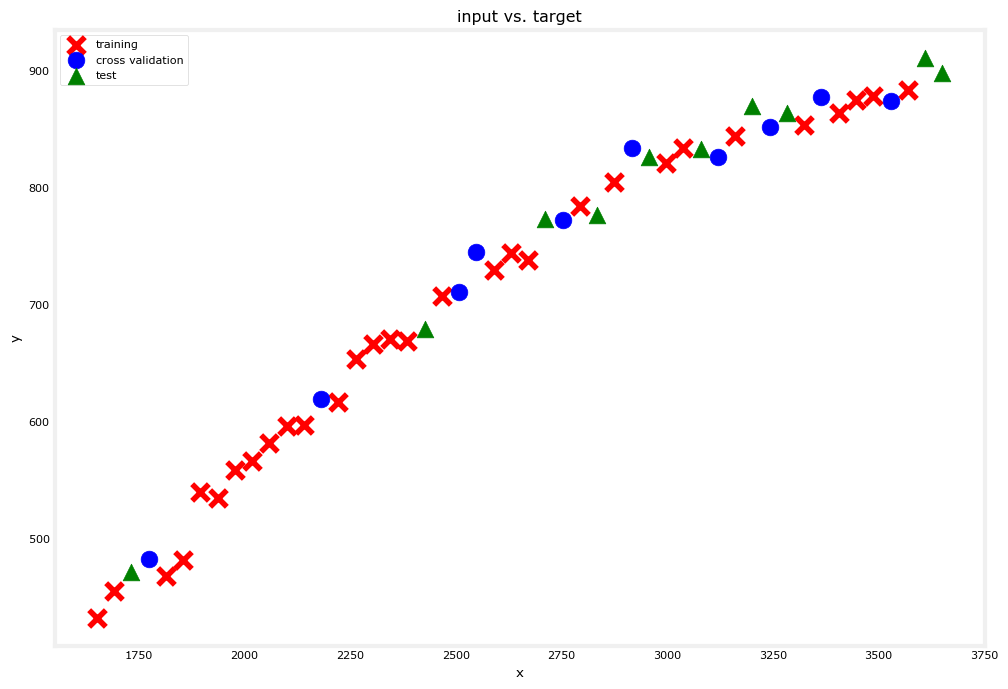

In [6]:
utils.plot_train_cv_test(x_train , y_train , x_cv , y_cv  , x_test , y_test , title="input vs target")

Feature scaling (z-score normailzation of data)

Computed mean of the training set: 2504.06
Computed standard deviation of the training set: 574.85


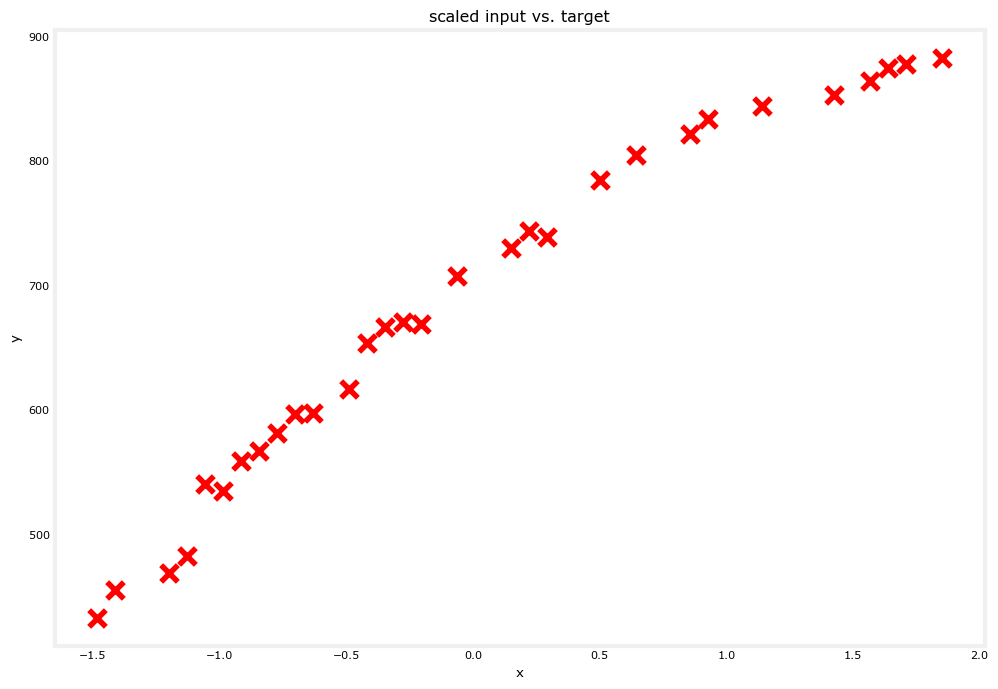

In [7]:
# initialize the class
scaler_linear=StandardScaler()

X_train_scaled = scaler_linear.fit_transform(x_train)

print(f"Computed mean of the training set: {scaler_linear.mean_.squeeze():.2f}")
print(f"Computed standard deviation of the training set: {scaler_linear.scale_.squeeze():.2f}")

# Plot the results
utils.plot_dataset(x=X_train_scaled, y=y_train, title="scaled input vs. target")

Train the model

In [8]:
# initialize the class
linear_model=LinearRegression()

linear_model.fit(X_train_scaled , y_train)

LinearRegression()

Evaluate the model

In [9]:
yhat=linear_model.predict(X_train_scaled)

print(f"training MSE (using sklearn function): {mean_squared_error(y_train , yhat)}")

total_squared_error=0

for i in range(len(yhat)):
    squared_error_i=(yhat[i] - y_train[i])**2
    total_squared_error+= squared_error_i

mse=total_squared_error/ (2*len(yhat))

print(f"training MSE (for-loop implementaion): {mse.squeeze()}")

training MSE (using sklearn function): 812.3874838506631
training MSE (for-loop implementaion): 406.19374192533155


In [10]:
# scale the cross validation set using the mean  and standard deviation of training set
X_cv_scaled = scaler_linear.transform(x_cv)

print(f"Mean used to scale to CV set: {scaler_linear.mean_.squeeze():.2f}")
print(f"Standard deviation used to scale the CV set: {scaler_linear.scale_.squeeze():.2f}")

yhat=linear_model.predict(X_cv_scaled)
print(f"Cross validation MSE: {mean_squared_error(y_cv, yhat) / 2}")

Mean used to scale to CV set: 2504.06
Standard deviation used to scale the CV set: 574.85
Cross validation MSE: 551.7789026952216


Adding polynomial Features

In [11]:
poly= PolynomialFeatures(degree=2 , include_bias=False)

X_train_mapped= poly.fit_transform(x_train)

print(X_train_mapped)

[[3.32e+03 1.11e+07]
 [2.34e+03 5.50e+06]
 [3.49e+03 1.22e+07]
 [2.63e+03 6.92e+06]
 [2.59e+03 6.71e+06]
 [1.81e+03 3.29e+06]
 [3.00e+03 8.99e+06]
 [2.22e+03 4.94e+06]
 [2.88e+03 8.27e+06]
 [2.06e+03 4.24e+06]
 [2.79e+03 7.81e+06]
 [3.45e+03 1.19e+07]
 [3.04e+03 9.23e+06]
 [2.39e+03 5.69e+06]
 [2.47e+03 6.09e+06]
 [2.67e+03 7.14e+06]
 [1.90e+03 3.59e+06]
 [1.94e+03 3.75e+06]
 [3.57e+03 1.27e+07]
 [1.69e+03 2.86e+06]
 [2.30e+03 5.31e+06]
 [1.65e+03 2.73e+06]
 [2.26e+03 5.12e+06]
 [1.86e+03 3.44e+06]
 [2.10e+03 4.41e+06]
 [2.02e+03 4.07e+06]
 [1.98e+03 3.91e+06]
 [2.14e+03 4.58e+06]
 [3.41e+03 1.16e+07]
 [3.16e+03 9.99e+06]]


In [12]:
scaler_ploy=StandardScaler()

X_train_mapped_scaled= scaler_ploy.fit_transform(X_train_mapped)

print(X_train_mapped_scaled[:5])

[[ 1.43  1.47]
 [-0.28 -0.36]
 [ 1.71  1.84]
 [ 0.22  0.11]
 [ 0.15  0.04]]


In [13]:
# initialize the class
model=LinearRegression()

model.fit(X_train_mapped_scaled, y_train)

yhat=model.predict(X_train_mapped_scaled)
print(f"training MSE: {mean_squared_error(y_train , yhat)/2}")

X_cv_mapped= poly.transform(x_cv)

X_cv_mapped_scaled= scaler_ploy.transform(X_cv_mapped)

yhat_cv=model.predict(X_cv_mapped_scaled)
print(f"crossvalidation mse: {mean_squared_error(y_cv , yhat_cv)/2}")

training MSE: 49.111609334025154
crossvalidation mse: 87.6984121111191


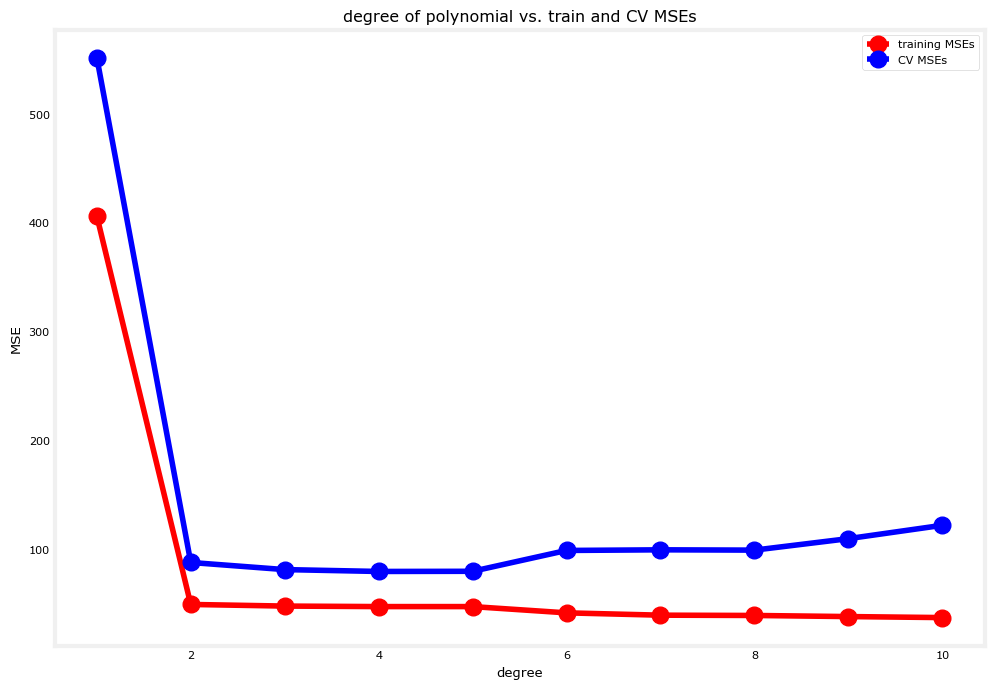

In [39]:
# Initialize lists to save the errors, models, and feature transforms
train_mses = []
cv_mses = []
models = []
polys = []
scalers = []

# Loop over 10 times. Each adding one more degree of polynomial higher than the last.
for degree in range(1,11):
    
    # Add polynomial features to the training set
    poly = PolynomialFeatures(degree, include_bias=False)
    X_train_mapped = poly.fit_transform(x_train)
    polys.append(poly)
    
    # Scale the training set
    scaler_poly = StandardScaler()
    X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)
    scalers.append(scaler_poly)
    
    # Create and train the model
    model = LinearRegression()
    model.fit(X_train_mapped_scaled, y_train )
    models.append(model)
    
    # Compute the training MSE
    yhat = model.predict(X_train_mapped_scaled)
    train_mse = mean_squared_error(y_train, yhat) / 2
    train_mses.append(train_mse)
    
    # Add polynomial features and scale the cross validation set
    X_cv_mapped = poly.transform(x_cv)
    X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)
    
    # Compute the cross validation MSE
    yhat = model.predict(X_cv_mapped_scaled)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    cv_mses.append(cv_mse)
    
# Plot the results
degrees=range(1,11)
utils.plot_train_cv_mses(degrees, train_mses, cv_mses, title="degree of polynomial vs. train and CV MSEs")

Choosing the best model

In [40]:
# get the model with lowest CV MSE
degree = np.argmin(cv_mses) + 1
print(f"Lowest CV MSE is found in the model with degree={degree}")

Lowest CV MSE is found in the model with degree=4


In [44]:
# Add polynomial features to the test set
X_test_mapped = polys[degree-1].transform(x_test)

# Scale the test set
X_test_mapped_scaled = scalers[degree-1].transform(X_test_mapped)

# Compute the test MSE
yhat = models[degree-1].predict(X_test_mapped_scaled)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Training MSE: {train_mses[degree-1]:.2f}")
print(f"Cross Validation MSE: {cv_mses[degree-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

Training MSE: 406.19
Cross Validation MSE: 551.78
Test MSE: 467.26


Neuarl Networks

Prepare the Data

In [45]:
degree = 1
poly = PolynomialFeatures(degree, include_bias=False)
X_train_mapped = poly.fit_transform(x_train)
X_cv_mapped = poly.transform(x_cv)
X_test_mapped = poly.transform(x_test)

In [46]:
# scale the features using the z-score
scaler = StandardScaler()
X_train_mapped_scaled = scaler.fit_transform(X_train_mapped)
X_cv_mapped_scaled = scaler.transform(X_cv_mapped)
X_test_mapped_scaled = scaler.transform(X_test_mapped)

Build and train the models

In [53]:
# initialize teh lists that will contain the errors for each model
nn_train_mses=[]
nn_cv_mses=[]

# build models
nn_models=utils.build_models()

# loop over the models
for model in nn_models:

    # setup the loss and optimizer

    model.compile(
        loss='mse',
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    )

    print(f"Training {model.name}...")

    # train the model
    model.fit(
        X_train_mapped_scaled ,y_train ,
        epochs=300 ,
        verbose=0
    )

    print("Done!\n")


    # Record the training MSEs
    yhat=model.predict(X_train_mapped_scaled)
    train_mse=mean_squared_error(y_train , yhat)/2
    nn_train_mses.append(train_mse)

    # Record the CV mses
    yhat=model.predict(X_cv_mapped_scaled)
    cv_mse=mean_squared_error(y_cv , yhat)/2
    nn_cv_mses.append(cv_mse)

# print results
print("RESULTS:")
for model_num in range(len(nn_train_mses)):
    print(
        f"Model {model_num+1}: Training MSE: {nn_train_mses[model_num]:.2f}, " +
        f"CV MSE: {nn_cv_mses[model_num]:.2f}"
        )

Training model_1...
Done!

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Training model_2...
Done!

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
Training model_3...
Done!

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
RESULTS:
Model 1: Training MSE: 406.19, CV MSE: 551.78
Model 2: Training MSE: 406.19, CV MSE: 551.78
Model 3: Training MSE: 73.40, CV MSE: 112.46


In [55]:
# select the model with the lowest CV MSE
model_num=3

# computer the test MSE
yhat=nn_models[model_num-1].predict(X_test_mapped_scaled)
test_mse=mean_squared_error(y_test , yhat)/2

print(f"Selected Model: {model_num}")
print(f"Training MSE: {nn_train_mses[model_num-1]:.2f}")
print(f"Cross Validation MSE: {nn_cv_mses[model_num-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Selected Model: 3
Training MSE: 73.40
Cross Validation MSE: 112.46
Test MSE: 131.70


Classification


In [56]:
# load the dataset 
data = np.loadtxt('./data/data_w3_ex2.csv', delimiter=',')

# Split the inputs and outputs into separate arrays
x_bc = data[:,:-1]
y_bc = data[:,-1]

# Convert y into 2-D because the commands later will require it (x is already 2-D)
y_bc = np.expand_dims(y_bc, axis=1)

print(f"the shape of the inputs x is: {x_bc.shape}")
print(f"the shape of the targets y is: {y_bc.shape}")

the shape of the inputs x is: (200, 2)
the shape of the targets y is: (200, 1)


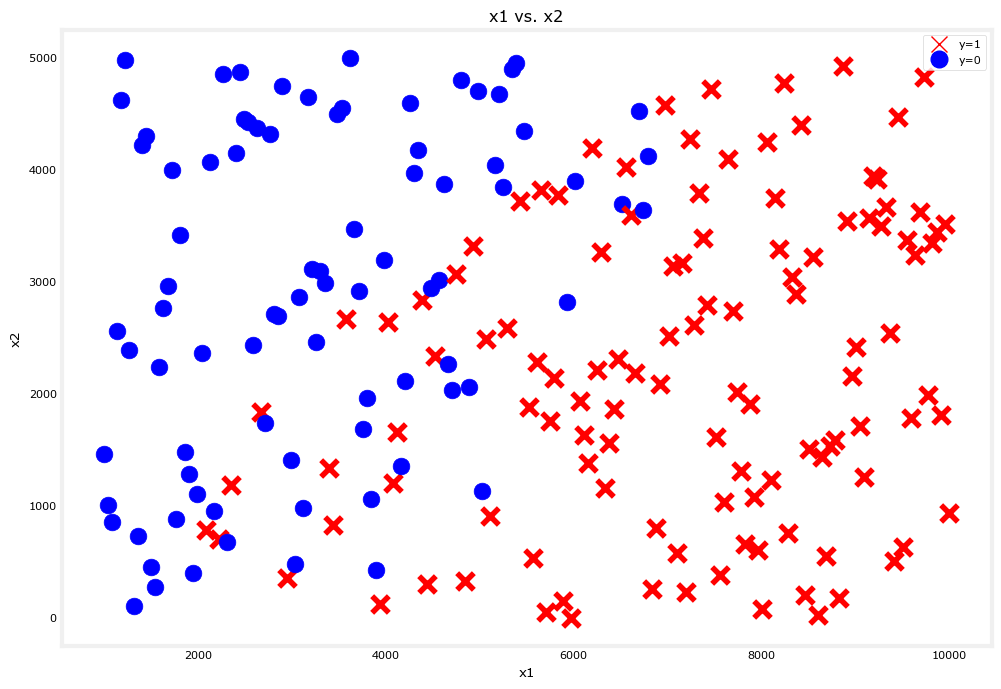

In [57]:
utils.plot_bc_dataset(x=x_bc, y=y_bc, title="x1 vs. x2")

In [58]:
from sklearn.model_selection import train_test_split

# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables.
x_bc_train, x_, y_bc_train, y_ = train_test_split(x_bc, y_bc, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_bc_cv, x_bc_test, y_bc_cv, y_bc_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

# Delete temporary variables
del x_, y_

print(f"the shape of the training set (input) is: {x_bc_train.shape}")
print(f"the shape of the training set (target) is: {y_bc_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_bc_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_bc_cv.shape}\n")
print(f"the shape of the test set (input) is: {x_bc_test.shape}")
print(f"the shape of the test set (target) is: {y_bc_test.shape}")

the shape of the training set (input) is: (120, 2)
the shape of the training set (target) is: (120, 1)

the shape of the cross validation set (input) is: (40, 2)
the shape of the cross validation set (target) is: (40, 1)

the shape of the test set (input) is: (40, 2)
the shape of the test set (target) is: (40, 1)


In [59]:
# Scale the features

# Initialize the class
scaler_linear = StandardScaler()

# Compute the mean and standard deviation of the training set then transform it
x_bc_train_scaled = scaler_linear.fit_transform(x_bc_train)
x_bc_cv_scaled = scaler_linear.transform(x_bc_cv)
x_bc_test_scaled = scaler_linear.transform(x_bc_test)

In [61]:
#  Sample model output
probabilities = np.array([0.2, 0.6, 0.7, 0.3, 0.8])

# Apply a threshold to the model output. If greater than 0.5, set to 1. Else 0.
predictions = np.where(probabilities >= 0.5, 1, 0)

# Ground truth labels
ground_truth = np.array([1, 1, 1, 1, 1])

# Initialize counter for misclassified data
misclassified = 0

# Get number of predictions
num_predictions = len(predictions)

# Loop over each prediction
for i in range(num_predictions):
    
    # Check if it matches the ground truth
    if predictions[i] != ground_truth[i]:
        
        # Add one to the counter if the prediction is wrong
        misclassified += 1

# Compute the fraction of the data that the model misclassified
fraction_error = misclassified/num_predictions

print(f"probabilities: {probabilities}")
print(f"predictions with threshold=0.5: {predictions}")
print(f"targets: {ground_truth}")
print(f"fraction of misclassified data (for-loop): {fraction_error}")
print(f"fraction of misclassified data (with np.mean()): {np.mean(predictions != ground_truth)}")

probabilities: [0.2 0.6 0.7 0.3 0.8]
predictions with threshold=0.5: [0 1 1 0 1]
targets: [1 1 1 1 1]
fraction of misclassified data (for-loop): 0.4
fraction of misclassified data (with np.mean()): 0.4


In [62]:
# Initialize lists that will contain the errors for each model
nn_train_error = []
nn_cv_error = []

# Build the models
models_bc = utils.build_models()

# Loop over each model
for model in models_bc:
    
    # Setup the loss and optimizer
    model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    )

    print(f"Training {model.name}...")

    # Train the model
    model.fit(
        x_bc_train_scaled, y_bc_train,
        epochs=200,
        verbose=0
    )
    
    print("Done!\n")
    
    # Set the threshold for classification
    threshold = 0.5
    
    # Record the fraction of misclassified examples for the training set
    yhat = model.predict(x_bc_train_scaled)
    yhat = tf.math.sigmoid(yhat)
    yhat = np.where(yhat >= threshold, 1, 0)
    train_error = np.mean(yhat != y_bc_train)
    nn_train_error.append(train_error)

    # Record the fraction of misclassified examples for the cross validation set
    yhat = model.predict(x_bc_cv_scaled)
    yhat = tf.math.sigmoid(yhat)
    yhat = np.where(yhat >= threshold, 1, 0)
    cv_error = np.mean(yhat != y_bc_cv)
    nn_cv_error.append(cv_error)

# Print the result
for model_num in range(len(nn_train_error)):
    print(
        f"Model {model_num+1}: Training Set Classification Error: {nn_train_error[model_num]:.5f}, " +
        f"CV Set Classification Error: {nn_cv_error[model_num]:.5f}"
        )

Training model_1...
Done!

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Training model_2...
Done!

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Training model_3...
Done!

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Model 1: Training Set Classification Error: 0.06667, CV Set Classification Error: 0.12500
Model 2: Training Set Classification Error: 0.06667, CV Set Classification Error: 0.15000
Model 3: Training Set Classification Error: 0.05833, CV Set Classification Error: 0.22500


In [63]:
# Select the model with the lowest error
model_num = 1

# Compute the test error
yhat = models_bc[model_num-1].predict(x_bc_test_scaled)
yhat = tf.math.sigmoid(yhat)
yhat = np.where(yhat >= threshold, 1, 0)
nn_test_error = np.mean(yhat != y_bc_test)

print(f"Selected Model: {model_num}")
print(f"Training Set Classification Error: {nn_train_error[model_num-1]:.4f}")
print(f"CV Set Classification Error: {nn_cv_error[model_num-1]:.4f}")
print(f"Test Set Classification Error: {nn_test_error:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Selected Model: 1
Training Set Classification Error: 0.0667
CV Set Classification Error: 0.1250
Test Set Classification Error: 0.1750
